In [7]:
import networkx as nx


In [11]:
G = nx.florentine_families_graph()

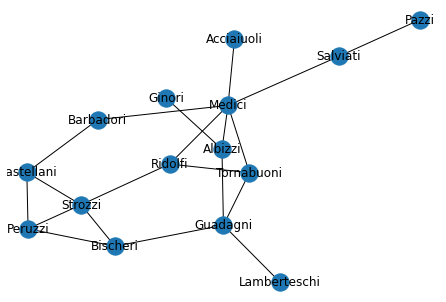

In [12]:
nx.draw(G, with_labels=True)

In [13]:
#we will write a function that takes a graph, computes different centrality measures, and returns a dataframe with
#the results
import pandas as pd
def get_centrality_scores(aGraph):
    df = pd.DataFrame()
    deg_cent = nx.degree_centrality(aGraph)
    closeness_cent = nx.closeness_centrality(aGraph)
    eig_cent = nx.eigenvector_centrality(aGraph)
    betweenness_cent = nx.betweenness_centrality(aGraph)
    #let us also get the number of triangles
    triangles = nx.triangles(aGraph)
    #finally, we will get the clustering coefficient -- that is, how redunant are node's connections
    clustering_coeff = nx.clustering(aGraph)
    #now populate the dataframe
    df['Nodes'] = list(deg_cent.keys())
    df['Degree_Centrality'] = list(deg_cent.values())
    df['Eigenvector_Centrality'] = list(eig_cent.values())
    df['Betweenness_Centrality'] = list(betweenness_cent.values())
    df['Triangles'] = list(triangles.values())
    df['Clustering_Coefficient'] = list(clustering_coeff.values())
    return df
    

In [16]:
data = get_centrality_scores(G)
data

,Nodes,Degree_Centrality,Eigenvector_Centrality,Betweenness_Centrality,Triangles,Clustering_Coefficient
0,Acciaiuoli,0.071429,0.132157,0.000000,0,0.000000
1,Medici,0.428571,0.430315,0.521978,1,0.066667
2,Castellani,0.214286,0.259020,0.054945,1,0.333333
3,Peruzzi,0.214286,0.275722,0.021978,2,0.666667
4,Strozzi,0.285714,0.355973,0.102564,2,0.333333
5,Barbadori,0.142857,0.211706,0.093407,0,0.000000
6,Ridolfi,0.214286,0.341554,0.113553,1,0.333333
7,Tornabuoni,0.214286,0.325847,0.091575,1,0.333333
8,Albizzi,0.214286,0.243961,0.212454,0,0.000000
9,Salviati,0.142857,0.145921,0.142857,0,0.000000


In [19]:
average_degree_centrality = sum(data['Degree_Centrality'].tolist()) / data.shape[0]
average_degree_centrality

0.19047619047619052

Text(0.5, 1.0, 'Florentine Families: Node Degree')

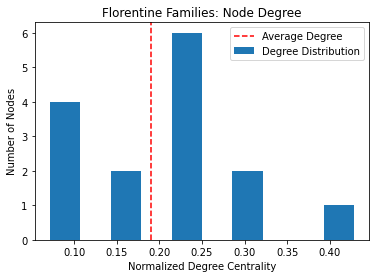

In [22]:
import matplotlib.pyplot as plt
plt.hist(data['Degree_Centrality'].tolist(),label='Degree Distribution')
plt.axvline(average_degree_centrality,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.xlabel('Normalized Degree Centrality')
plt.ylabel('Number of Nodes')
plt.title('Florentine Families: Node Degree')

Let us detect some communities in our graph.

In [18]:
#we will first try cliques
cliques = nx.find_cliques(G)
list(cliques)

[['Ginori', 'Albizzi'],
 ['Pazzi', 'Salviati'],
 ['Peruzzi', 'Strozzi', 'Bischeri'],
 ['Peruzzi', 'Strozzi', 'Castellani'],
 ['Castellani', 'Barbadori'],
 ['Bischeri', 'Guadagni'],
 ['Lamberteschi', 'Guadagni'],
 ['Strozzi', 'Ridolfi'],
 ['Medici', 'Tornabuoni', 'Ridolfi'],
 ['Medici', 'Barbadori'],
 ['Medici', 'Salviati'],
 ['Medici', 'Albizzi'],
 ['Medici', 'Acciaiuoli'],
 ['Guadagni', 'Tornabuoni'],
 ['Guadagni', 'Albizzi']]

In [77]:
#what is the maximal clique among the cliques
cliques = nx.find_cliques(G)
maximal_clique = max(list(cliques), key = len)


In [78]:
maximal_clique

['Peruzzi', 'Strozzi', 'Bischeri']

Note that nodes can belong to multiple cliques. One can look at co-occurrence of nodes in cliques and obtain meaningful grouping based on that. Let us look at k-cliques.`

In [81]:
list(nx.degree(G))

[('Acciaiuoli', 1),
 ('Medici', 6),
 ('Castellani', 3),
 ('Peruzzi', 3),
 ('Strozzi', 4),
 ('Barbadori', 2),
 ('Ridolfi', 3),
 ('Tornabuoni', 3),
 ('Albizzi', 3),
 ('Salviati', 2),
 ('Pazzi', 1),
 ('Bischeri', 3),
 ('Guadagni', 4),
 ('Ginori', 1),
 ('Lamberteschi', 1)]

In [80]:
#let us examine k-cores -- nodes that have a degree of at least k
k_core_2 = nx.k_core(G, 2)
list(k_core_2)

['Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Bischeri',
 'Guadagni']

In [24]:
from networkx.algorithms.community import k_clique_communities
list(k_clique_communities(G, 3))

[frozenset({'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Medici', 'Ridolfi', 'Tornabuoni'})]

In [29]:
#let us try other paritioning/community detection algorithms
from networkx.algorithms.community import greedy_modularity_communities, label_propagation_communities, girvan_newman

In [30]:
greedy = greedy_modularity_communities(G)
list(greedy)

[frozenset({'Acciaiuoli',
            'Medici',
            'Pazzi',
            'Ridolfi',
            'Salviati',
            'Tornabuoni'}),
 frozenset({'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Strozzi'}),
 frozenset({'Albizzi', 'Ginori', 'Guadagni', 'Lamberteschi'})]

In [31]:
#How good is the partitioning? Use modularity
from networkx.algorithms.community import modularity
modularity(G, greedy)

0.39874999999999994

In [32]:
#let us try label_propagation_communities
label = label_propagation_communities(G)
list(label)

[{'Albizzi', 'Ginori'},
 {'Acciaiuoli', 'Medici', 'Pazzi', 'Salviati'},
 {'Barbadori', 'Bischeri', 'Castellani', 'Peruzzi', 'Ridolfi', 'Strozzi'},
 {'Guadagni', 'Lamberteschi', 'Tornabuoni'}]

In [34]:
modularity(G, label_propagation_communities(G))

0.33499999999999996

In [38]:
g_newman = girvan_newman(G)
#list(g_newman)

In [39]:
node_groups = []
for com in next(g_newman):
  node_groups.append(list(com))

In [40]:
node_groups

[['Ginori',
  'Tornabuoni',
  'Barbadori',
  'Peruzzi',
  'Guadagni',
  'Castellani',
  'Bischeri',
  'Lamberteschi',
  'Albizzi',
  'Medici',
  'Acciaiuoli',
  'Strozzi',
  'Ridolfi'],
 ['Salviati', 'Pazzi']]

In [41]:
modularity(G, node_groups)

0.08875000000000005

In [45]:
import community as community_louvain
partition = community_louvain.best_partition(G)
list(partition)

['Acciaiuoli',
 'Medici',
 'Castellani',
 'Peruzzi',
 'Strozzi',
 'Barbadori',
 'Ridolfi',
 'Tornabuoni',
 'Albizzi',
 'Salviati',
 'Pazzi',
 'Bischeri',
 'Guadagni',
 'Ginori',
 'Lamberteschi']

In [48]:
#Useful functions from https://orbifold.net/default/community-detection-using-networkx/

def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

In [56]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv


Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 21.73it/s]


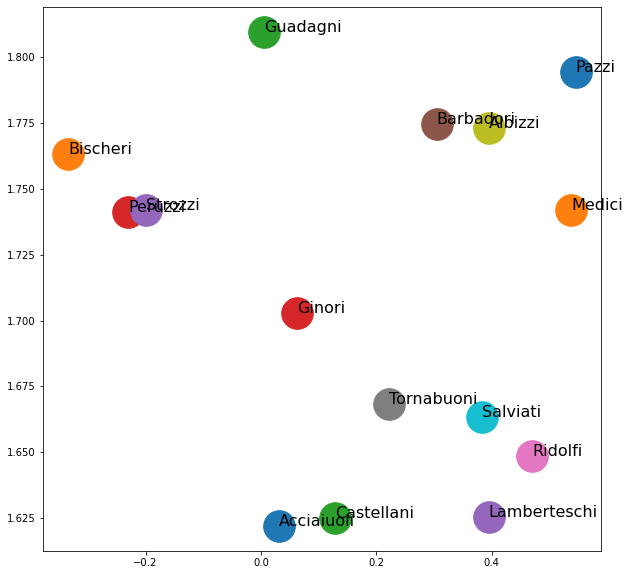

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

array([[ 0.537172  ,  1.7420921 ],
       [ 0.00559797,  1.8095876 ],
       [-0.19969472,  1.7420462 ],
       [ 0.39489534,  1.7729616 ],
       [ 0.22172917,  1.6682955 ],
       [ 0.47029924,  1.6486953 ],
       [ 0.12861058,  1.6252174 ],
       [-0.33386543,  1.7633796 ],
       [-0.23008475,  1.7410399 ],
       [ 0.3825974 ,  1.6634609 ],
       [ 0.30461442,  1.7746099 ],
       [ 0.03040619,  1.6220074 ],
       [ 0.3942222 ,  1.6253757 ],
       [ 0.5450531 ,  1.7944376 ],
       [ 0.06297927,  1.702738  ]], dtype=float32)